

# Project: Investigate a Dataset - [tmdb_movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The Movie Database (TMDB) is a community built movie and TV database. Every piece of data has been added by our amazing community dating back to 2008. </br>
This data set contains information about over 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> - Certain columns, like *‘cast’* and *‘genres’*, contain multiple values separated by pipe `(|)` characters.
> - There are some odd characters in the *‘cast’* column. 
> - The final two columns ending with *“_adj”* show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
1.  Which director made the most popular movie? </br></br>
2. What period of the year(release date) grossed the greatest revenue? Based on this information, the director can choose to release the movie at such period in the year. </br></br>
3. Does higher budget necessarily leads to higher revenue? </br></br>
4. That a movie is highly voted for on the average necessarily mean the movie is widely accepted(popularity)? </br></br>
5. What year had the highest movie releases? </br></br>
6. Which movie i.e.original title( alongide its genre, director) is highly rated. </br></br>
7. Do people appreciate longer time movies or not? </br></br> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 


### General Properties


In [3]:
# Loading my data, printing out a few lines and performing operations to inspect data
df_movies = pd.read_csv('tmdb-movies.csv')
#to print the first  rows of the dataset 
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#to view the shape. i.e. rows and columns of the data
df_movies.shape

(10866, 21)

In [5]:
#to view the columns of the dataset
df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
#to view summary statistics of the dataset
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#to view the dataset information
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
#to view the number of unique elements of each column of the dataset
df_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
#to determine the sum of null elements per column of the dataset
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning

 

#### 1. Ensuring data types meets the kind of data in dataset

In [10]:
# Converting the data type of release date and release year to datetime type
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies['release_year'] = df_movies['release_year'].astype('datetime64[ns]')
#To confirm that the data types of each column is correct
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null datetime64[ns]
budget_a

#### 2. Working on duplicates

In [11]:
#checking for duplicates
df_movies[df_movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,1970-01-01 00:00:00.000002010,30000000.0,967000.0


In [12]:
#Count of duplicates
df_movies.duplicated().sum()

1

In [13]:
# drop duplicates
df_movies.drop_duplicates(inplace=True)

In [14]:
#Rechecking for duplicates
sum(df_movies.duplicated())

0

#### 3. Removing redundant columns. e.g. the budget and revenue columns will be dropped and the adjusted budget and revenue

In [15]:
#columns will be renamed to the budget and revenue columns respectively. This is because the adjusted columns represents the amount 
# of these columns with considering 2010 inflation
df_movies.drop(['budget', 'revenue'], axis = 1, inplace = True)

In [16]:
#checking if columns have been dropped
df_movies.head(1)

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09


In [17]:
#renaming columns of the adjusted buget and revenue respectively, runtime to duration and original title to movie title
df_movies = df_movies.rename(columns={'budget_adj': 'budget', 'revenue_adj': 'revenue', 'runtime': 'duration','original_title': 'movie_title'})

In [18]:
#checking if columns have been properly renamed
df_movies.head(1)

,id,imdb_id,popularity,movie_title,cast,homepage,director,tagline,keywords,overview,duration,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09


#### 4. Dealing with missing data

In [19]:

#Determing the count of missing data in each column
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
movie_title                0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
duration                   0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget                     0
revenue                    0
dtype: int64

In [20]:
#For the missing data
#Dropping the columns that would not be material for the analysis
df_movies.drop(['imdb_id', 'overview','tagline','keywords','vote_count','homepage'], axis = 1, inplace = True)
df_movies.head()

,id,popularity,movie_title,cast,director,duration,genres,production_companies,release_date,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,1970-01-01 00:00:00.000002015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,1970-01-01 00:00:00.000002015,1.747999e+08,1.385749e+09


In [21]:
#Since it is not possible to act a movie with no budget and 0 duration, the dataset was queried as follows :
#to query the dataset for non zero budget and duration respectively
df_movies_non_zero_budget = df_movies[df_movies['budget'] != 0]
df_movies_non_zero_budget_non_zero_duration = df_movies_non_zero_budget[df_movies_non_zero_budget['duration'] != 0]
df_movies_non_zero_budget_non_zero_duration

,id,popularity,movie_title,cast,director,duration,genres,production_companies,release_date,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,1970-01-01 00:00:00.000002015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,1970-01-01 00:00:00.000002015,1.747999e+08,1.385749e+09
5,281957,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,7.2,1970-01-01 00:00:00.000002015,1.241999e+08,4.903142e+08
6,87101,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,5.8,1970-01-01 00:00:00.000002015,1.425999e+08,4.053551e+08
7,286217,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,7.6,1970-01-01 00:00:00.000002015,9.935996e+07,5.477497e+08
8,211672,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,6.5,1970-01-01 00:00:00.000002015,6.807997e+07,1.064192e+09
9,150540,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,8.0,1970-01-01 00:00:00.000002015,1.609999e+08,7.854116e+08


In [22]:
#checking it with summary statistics
df_movies_non_zero_budget_non_zero_duration.describe()

,id,popularity,duration,vote_average,budget,revenue
count,5166.000000,5166.000000,5166.000000,5166.000000,5.166000e+03,5.166000e+03
mean,45474.077816,0.992825,107.158343,6.033101,3.690807e+07,1.022546e+08
std,72673.353003,1.329525,22.670118,0.883426,4.196569e+07,1.959608e+08
min,5.000000,0.001117,4.000000,1.500000,9.210911e-01,0.000000e+00
25%,8839.250000,0.348024,93.000000,5.500000,8.103886e+06,0.000000e+00
50%,12960.000000,0.624960,103.000000,6.100000,2.273559e+07,2.872138e+07
75%,44935.250000,1.152807,117.000000,6.600000,5.008384e+07,1.134411e+08
max,417859.000000,32.985763,540.000000,8.400000,4.250000e+08,2.827124e+09


In [23]:
#viewing its shape
df_movies_non_zero_budget_non_zero_duration.shape

(5166, 13)

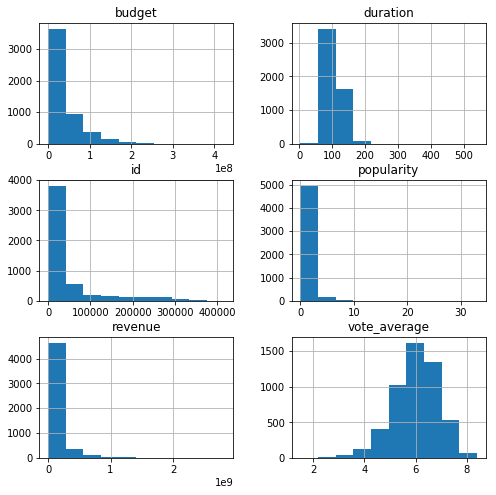

In [24]:
#Summanry visualization of all the cleaned dataset
df_movies_non_zero_budget_non_zero_duration.hist(figsize=(8, 8));

In [25]:
#info
df_movies_non_zero_budget_non_zero_duration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5166 entries, 0 to 10865
Data columns (total 13 columns):
id                      5166 non-null int64
popularity              5166 non-null float64
movie_title             5166 non-null object
cast                    5155 non-null object
director                5162 non-null object
duration                5166 non-null int64
genres                  5165 non-null object
production_companies    5032 non-null object
release_date            5166 non-null datetime64[ns]
vote_average            5166 non-null float64
release_year            5166 non-null datetime64[ns]
budget                  5166 non-null float64
revenue                 5166 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(2), object(5)
memory usage: 565.0+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Which director made the most popular movie?

In [26]:
max_popularity = df_movies['popularity'].max()
df_movies[df_movies['popularity'] == max_popularity].director 


0    Colin Trevorrow
Name: director, dtype: object

> Colin Trevorrow is the director that made the most popular movie in the dataset

### 2. What period of the year(release date) grossed the greatest revenue? Based on this information, the director can choose to release the movie at such period in the year

In [27]:
#To split dates into months and years
df_movies['release_month'] = df_movies.release_date.dt.month
#drop the release_year column as it was wrongly formated
df_movies.drop(columns = ['release_year'], axis = 1, inplace = True)
#Replacing the dropped release_year with correct year
df_movies['release_year'] = df_movies.release_date.dt.year

df_movies.head()


,id,popularity,movie_title,cast,director,duration,genres,production_companies,release_date,vote_average,budget,revenue,release_month,release_year
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,1.379999e+08,1.392446e+09,6,2015
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,1.379999e+08,3.481613e+08,5,2015
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,1.012000e+08,2.716190e+08,3,2015
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,1.839999e+08,1.902723e+09,12,2015
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,1.747999e+08,1.385749e+09,4,2015


In [28]:
#defining a function for the scatter plot chart
def scatter_plot_chart(x_axis,y_axis,x_axis_label,y_axis_label,title_label):
    df_movies.plot.scatter(x = x_axis,
                       y=y_axis,
                     figsize=(10,8));
    plt.xlabel(x_axis_label, fontsize=18),
    plt.ylabel(y_axis_label, fontsize=18)
    plt.title(title_label, fontsize=18)
    plt.legend()
    

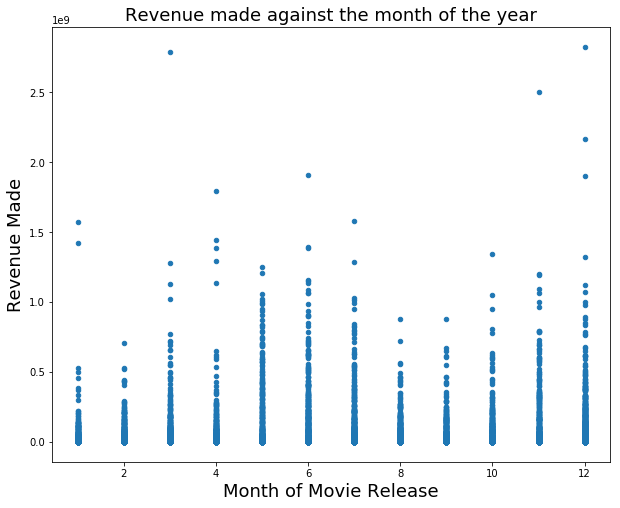

In [29]:
#Visualizing the data to answer the question 2 above
month_revenue_plot = scatter_plot_chart('release_month','revenue','Month of Movie Release','Revenue Made','Revenue made against the month of the year' )
month_revenue_plot

> We observed from that the movies that were released at half year and end of the year, i.e. 6 months and 12 months respectively grossed
> the greater revenue. Hence, a director would be advised to release his movie around half year and end of the year to make maximum profit

### 3. Does higher budget necessarily leads to higher revenue?

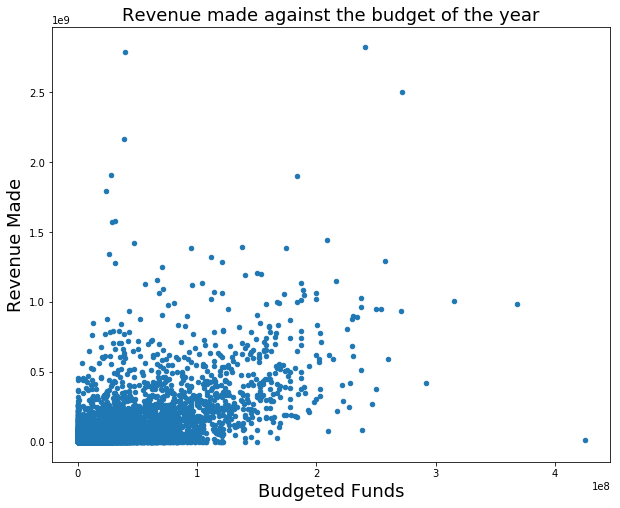

In [30]:
#Exploratory data analysis to answer question 3 above
budget_revenue_plot = scatter_plot_chart('budget','revenue','Budgeted Funds','Revenue Made','Revenue made against the budget of the year' )
budget_revenue_plot


> The scatter plot above is positively correlated. Hence, it is observed that movies made using higher budget made more revenue.
> Hence, we could advise that a production company should set out a higher budget to make more income


### 4. That a movie is highly voted for on the average necessarily mean the movie is widely accepted(popularity)?

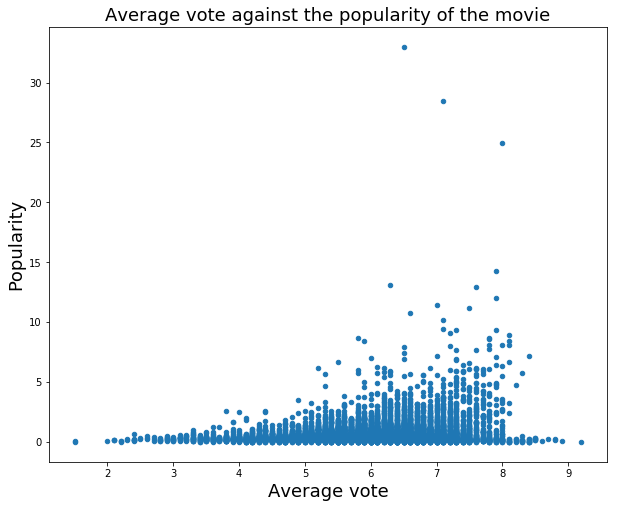

In [31]:
#Using plotting packages to visualise the data and answer the question 4 above
average_vote_revenue_plot = scatter_plot_chart('vote_average','popularity','Average vote','Popularity','Average vote against the popularity of the movie' )
average_vote_revenue_plot


> The scatter plot above is positively correlated. Hence, it is observed that on the average people voted for the most popular movies


### 5. What year had the highest movie releases?

In [32]:
#using statistic formulas to answer question 5
df_movies.release_year.median

<bound method Series.median of 0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10861    2066
10862    2066
10863    2066
10864    2066
10865    2066
Name: release_year, Length: 10865, dtype: int64>

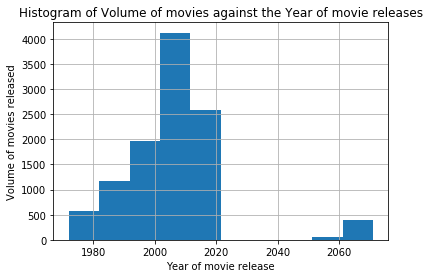

In [33]:
#using histogram to view highest movie release
df_movies.release_year.hist();
plt.title('Histogram of Volume of movies against the Year of movie releases')
plt.xlabel('Year of movie release')
plt.ylabel('Volume of movies released')
plt.legend()

In [34]:
df_movies[df_movies['release_year'] == 2015].shape

(629, 14)

> 2015 was the year when there was the largest volume of movie released in the dataset

##### Investigating why there was huge release of movies in 2015 from the dataset

In [35]:
df_movies_2015_movies = df_movies[df_movies['release_year'] == 2015]

In [36]:
#Using summary statistics
df_movies_2015_movies.describe()

,id,popularity,duration,vote_average,budget,revenue,release_month,release_year
count,629.000000,629.000000,629.000000,629.000000,6.290000e+02,6.290000e+02,629.000000,629.0
mean,296762.012719,1.030657,96.375199,5.885692,1.111100e+07,3.914379e+07,6.642289,2015.0
std,58581.837941,2.233958,26.087965,1.087283,3.052940e+07,1.543759e+08,3.297972,0.0
min,10317.000000,0.003920,0.000000,2.400000,0.000000e+00,0.000000e+00,1.000000,2015.0
25%,271736.000000,0.203224,88.000000,5.200000,0.000000e+00,0.000000e+00,4.000000,2015.0
50%,309887.000000,0.394466,95.000000,5.900000,0.000000e+00,0.000000e+00,7.000000,2015.0
75%,334028.000000,0.956096,107.000000,6.700000,5.519998e+06,3.023531e+06,9.000000,2015.0
max,395883.000000,32.985763,300.000000,8.900000,2.575999e+08,1.902723e+09,12.000000,2015.0


> I cannot say in particular the reason for the spike in movie release in 2015 compared to the other years

### 6. Which movie i.e.original title( alongide its genre, director) is highly rated.

In [37]:
most_rated = df_movies['vote_average'].max()
df_movies[df_movies['vote_average'] == most_rated]

,id,popularity,movie_title,cast,director,duration,genres,production_companies,release_date,vote_average,budget,revenue,release_month,release_year
3894,125336,0.006925,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,NaN,2011-09-03,9.2,0.0,0.0,9,2011


> The best rated movie is "The Story of Film: An Odyssey" which was directed by Mark Cousins and it was a documentary

### 7. Do people appreciate longer time movies or not?

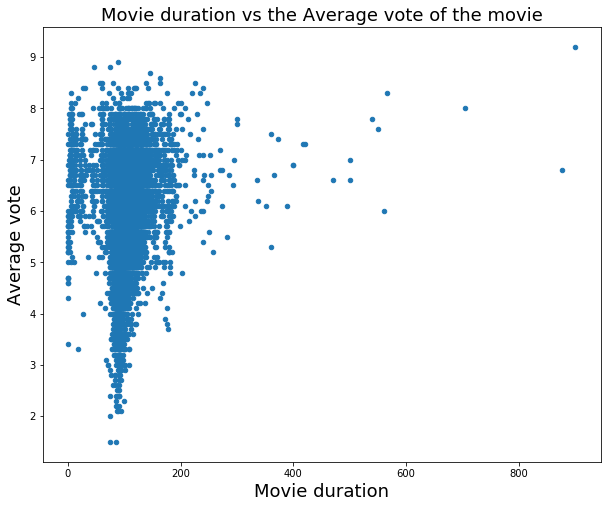

In [38]:
duration_average_vote_plot = scatter_plot_chart('duration','vote_average','Movie duration','Average vote','Movie duration vs the Average vote of the movie' )
duration_average_vote_plot

> From the visualization, people do appreciate movies of the about 120 minutes duration(i.e. about 2hours) but start losing satisfaction as soon as the duration begin to exceed 200 minutes. 

<a id='conclusions'></a>
## Conclusions

#### Results

> In conclusion, movie making is time sensitive in the sense that to make maximum revenue, it is advised to release the movies at the mid-year( around the summer time) and also the festive seasons at the end of the year.

> Also no matter how popular a movie is, people lose satisfaction once the movie duration start to exceed 200 minutes (around 3 hours).

> There was a huge movie revolution in the year 2015 as that was the year of the highest release of movies

#### Limitations
> As much as we can deduce some results from these dataset, we cannot say for certain or generalise the results over the movie
industry worldwide because not all data of the movie industires was analysed. Hence, the results are tentative.

> There was a lot of null values for certain columns in the dataset, e.g the director, production companies, genres etc. This 
really imparted negatively on the analysis of data with regards to these missing data.

> There was no convincing data to show the reason for the huge release of movies in the year 2015.





In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0